In [1]:
import sys
sys.path.insert(1, '../src')
from utils import *

In [ ]:
df = compute_stats('AMZN')

In [ ]:
plot_stock_price('AMZN', start_date='2019-11-02', end_date='2020-01-29' )

In [ ]:
[x for x in df.columns if 'eps' in x]

In [ ]:
(df['price'] / df['epsTrailingTwelveMonths'] -8.5) / 2

## Getting historic stock dividends

In [ ]:
get_historical_data('AAPL', start_date='2019-01-02', end_date='2020-01-27', source = 'yahoo-dividends')

In [ ]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

In [ ]:
symbols = get_nasdaq_symbols()

In [ ]:
symbols.loc['AMZN']

In [ ]:
get_historical_data('AMZN', start_date='2017-01-02', end_date='2020-01-27', source = 'moex')

In [ ]:
import pandas_datareader.data as web
df = web.DataReader('AMZN', 'quandl', '2015-01-01', '2018-01-05', api_key='BmJVubzprhGvdyXjESjv')

In [ ]:
df

## Analyzing the earnings data

Useful links:

http://www.stockpup.com/data/

* detemining growth rate

In [2]:
def company_earnings(ticker, plot = False):
    CSV_URL = "http://www.stockpup.com/data/{}_quarterly_financial_data.csv".format(ticker)
    try:
        stockpup_df = pd.read_csv(CSV_URL)
    except:
        print("Could not download the ticker information from http://www.stockpup.com/data/")
        return None, None 
    earnings_and_dates = [(float(stockpup_df['EPS basic'].iloc[x]), datetime.datetime.strptime(\
                           stockpup_df['Quarter end'].iloc[x], '%Y-%m-%d'))for x in range(stockpup_df.shape[0]) \
                          if stockpup_df['EPS basic'].iloc[x] !='None' ]

    earnings = [x[0] for x in earnings_and_dates]
    earning_dates = [x[1] for x in earnings_and_dates]

    if plot:
        plt.figure(figsize=(16,6))
        plt.plot(earning_dates, earnings)
        plt.grid(color='g', linestyle='-.', linewidth=0.5)
        plt.legend(["{} earnings from {} to {}".format(ticker, stockpup_df['Quarter end'].iloc[-1],\
                                                              stockpup_df['Quarter end'].iloc[0])])
        plt.savefig('../results/earnings_{}_from_{}_to_{}.png'.format(ticker, stockpup_df['Quarter end'].iloc[-1],\
                                                              stockpup_df['Quarter end'].iloc[0]))
    return earning_dates, earnings

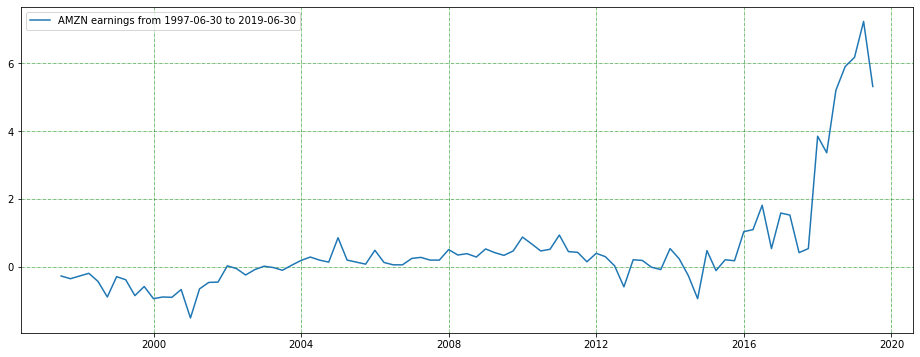

In [3]:
x, y = company_earnings("AMZN", plot=True)

In [42]:
def company_growth_rate(ticker, num_years):
    earning_dates, earnings = company_earnings(ticker)
    if len(earning_dates) < 2:
        print("Not enough data to compute growth!")
        return None
    time_indx = 1 
    while time_indx < len(earning_dates):
        time_indx += 1 
        if time_indx < len(earning_dates) and\
                    earning_dates[0] - earning_dates[time_indx] > datetime.timedelta(days = num_years*365):
            time_indx -= 1
            break 

    updated_earnings = earnings[:time_indx+1]
    updated_earning_dates = earning_dates[:time_indx+1]
    quarterly_earnings_growth = [round(i / j - 1, 2) for i, j in zip(updated_earnings[: -1], updated_earnings[1 :])]
    
    sum_yearly_earnings = collections.defaultdict(float)
    count_yearly_earnings = collections.defaultdict(int)
    
    for i, earning_date in enumerate(updated_earning_dates):
        sum_yearly_earnings[earning_date.year] += earnings[i]
        count_yearly_earnings[earning_date.year] += 1
    
    avg_yearly_earnings = {x : round(sum_yearly_earnings[x]/count_yearly_earnings[x], 2) for x in sum_yearly_earnings}
    avg_yearly_earnings_growth = {x:round(100*(avg_yearly_earnings[x+1]/avg_yearly_earnings[x]-1), 1) if x+1 in\
                                  avg_yearly_earnings else None for x in sorted(avg_yearly_earnings.keys())[::-1]}
    
    return avg_yearly_earnings_growth, avg_yearly_earnings, updated_earnings, quarterly_earnings_growth, updated_earning_dates 

In [ ]:
x, y = company_earnings('AMZN', 5)

In [ ]:
M,N=company_earnings("BRK.A", plot=True)

In [ ]:
plt.plot(y[::-1]) 
plt.grid(color='g', linestyle='-.', linewidth=0.5)

In [43]:
x, y, z, w, v = company_growth_rate('EXPE', 15)

In [44]:
x

{2019: None,
 2018: -60.3,
 2017: 9.7,
 2016: 31.9,
 2015: -68.2,
 2014: 89.7,
 2013: 81.4,
 2012: -17.3,
 2011: 4.0,
 2010: 35.1,
 2009: 42.3,
 2008: -111.8,
 2007: -980.0,
 2006: 38.9,
 2005: -25.0}

In [23]:
w[2019]/w[2018]

1.2147001934235977